### Cost Benefit Questions

1. How would you rephrase the business problem if your model was optimizing toward _precision_? i.e., How might the model behave differently, and what effect would it have?<br/>
recall a piece of precision accuracy is total right
2. How would you rephrase the business problem if your model was optimizing toward _recall_?
3. What would the most ideal model look like in this case?


### Visualizing models over variables

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../assets/dataset/flight_delays.csv')
df = df.loc[df.DEP_DEL15.notnull()].copy()

In [ ]:
df.dtypes

In [ ]:
df.groupby('CARRIER').apply(lambda group: len (group))

In [ ]:
df.groupby('UNIQUE_CARRIER').count()a

In [ ]:
df.head(20)

In [ ]:
df = df[df.DEP_DEL15.notnull()]
df = df.join(pd.get_dummies(df['CARRIER'], prefix='carrier'))
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))
model = lm.LogisticRegression()
features = [i for i in df.columns if 'dow_' in i]

In [ ]:
print features
df[features].head()

In [99]:
df.head(10)

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,...,carrier_WN,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dow_7,probability,probCarrier
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.129193,0.830760
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.129193,0.830760
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.158102,0.795143
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.157153,0.796299
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.165363,0.786313
6,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,13830,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.156681,0.796876
7,1,4,2015-01-01,AA,19805,AA,12173,1217302,32134,11298,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.213394,0.729039
8,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.113955,0.849839
9,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.265939,0.668536
10,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147473,0.808151


In [100]:
df.shape
# rows and columns

(458311, 39)

In [101]:
model.fit(df[features[1:]], df['DEP_DEL15'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
model.predict_proba(df[features[1:]])

array([[ 0.83076017,  0.16923983],
       [ 0.83076017,  0.16923983],
       [ 0.7951428 ,  0.2048572 ],
       ..., 
       [ 0.84717018,  0.15282982],
       [ 0.84297817,  0.15702183],
       [ 0.83724387,  0.16275613]])

In [103]:
model.predict_proba(df[features[1:]]).T

array([[ 0.83076017,  0.83076017,  0.7951428 , ...,  0.84717018,
         0.84297817,  0.83724387],
       [ 0.16923983,  0.16923983,  0.2048572 , ...,  0.15282982,
         0.15702183,  0.16275613]])

In [104]:
features += ['CRS_DEP_TIME']
model.fit(df[features[1:]], df['DEP_DEL15'])
# dropping Sunday [1:]  df['DEP_DEL15'] is y
df['probability'] = model.predict_proba(df[features[1:]]).T[1]
# T transpose
# array of lists probability of failure and probability of success - appending to column with T


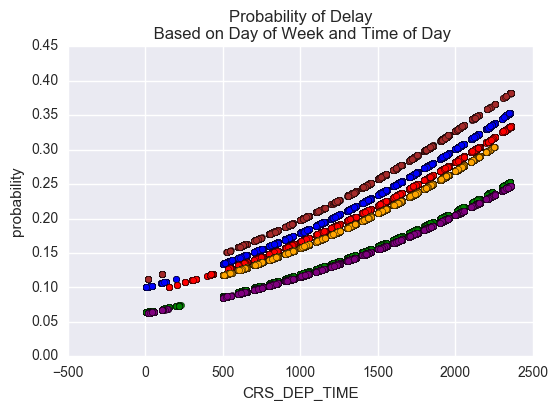

In [105]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)
# features a list day of the week - df where 
ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')


### Other Answers: visualizing Airline or the inverse

In [117]:
features2 = [i for i in df.columns if 'carrier_' in i]
features2 += ['CRS_DEP_TIME']
#...

In [ ]:
model.fit(df[features2[1:]], df['DEP_DEL15'])

In [96]:
df['probCarrier'] = model.predict_proba(df[features2[1:]]).T[0]

In [97]:
# #  colors = 'rbgyrgby'
#     for column in combos.prestige.unique():
#         plotData = group.ix[group.index.get_level_values(1)==column]
#         pl.plot(plotData.index.get_level_values(0), plotData['prediction'], color=colors[int(column)])

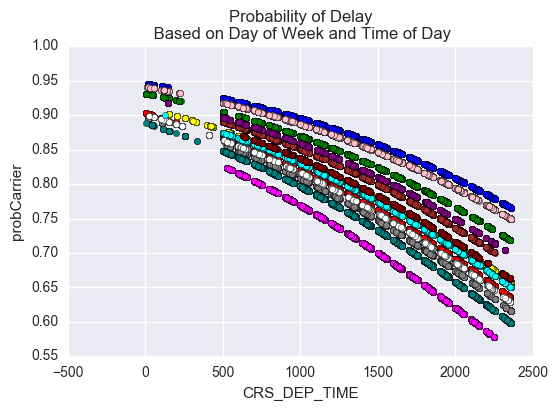

In [129]:
ax = plt.subplot(111)

colors = ['red', 'green', 'yellow', 'blue', 'brown', 'grey', 'purple', 'magenta', 'white', 'cyan', 'teal', 'pink', 'maroon']

for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probCarrier', kind='scatter', color = c, ax=ax)
    
ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')

In [95]:
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']

model.fit(df[features[1:]], df.DEP_DEL15)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Visualizing Performance Against Baseline

#### Visualizing AUC and comparing Models

In [108]:
from sklearn import dummy, metrics

In [109]:
# random guess
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]

# real model
model1 = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_1'] = model.predict_proba(df[features[1:]]).T[1]


In [110]:
df.shape

(458311, 41)

[(0, 1),
 (0, 1),

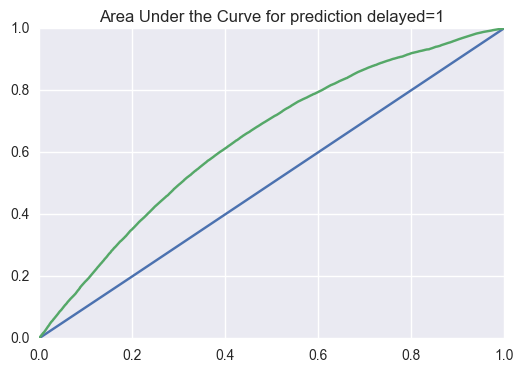

In [111]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))


# ROC curve area under thr ROC curve is the accuracy

#### Visualizing Precision / Recall

In [123]:
df['prediction'] = model.predict(df[features[1:]])
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,...,dow_3,dow_4,dow_5,dow_6,dow_7,probability,probCarrier,probability_0,probability_1,prediction
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0.0,1.0,0.0,0.0,0.0,0.169340,0.830760,0,0.169340,0.0
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0.0,1.0,0.0,0.0,0.0,0.169340,0.830760,0,0.169340,0.0
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0.0,1.0,0.0,0.0,0.0,0.203189,0.795143,1,0.203189,0.0
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0.0,1.0,0.0,0.0,0.0,0.202093,0.796299,1,0.202093,0.0
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,...,0.0,1.0,0.0,0.0,0.0,0.211550,0.786313,0,0.211550,0.0


In [124]:
metrics.accuracy_score(df.DEP_DEL15, df.prediction)

0.80149287274361736

In [125]:
print metrics.classification_report(df.DEP_DEL15, df.prediction)

             precision    recall  f1-score   support

        0.0       0.80      1.00      0.89    367333
        1.0       0.00      0.00      0.00     90978

avg / total       0.64      0.80      0.71    458311



C:\Users\Amber\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
df.groupby('prediction').count()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,...,dow_2,dow_3,dow_4,dow_5,dow_6,dow_7,probability,probCarrier,probability_0,probability_1
prediction,,,,,,,,,,,,,,,,,,,,,
0.0,458311,458311,458311,458311,458311,458311,458311,458311,458311,458311,...,458311,458311,458311,458311,458311,458311,458311,458311,458311,458311


In [128]:
df.shape

(458311, 42)